In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ucimlrepo import fetch_ucirepo 

import pandas as pd
# import piplite
# await piplite.install('seaborn')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score
from statistics import stdev, mean
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
features = breast_cancer_wisconsin_diagnostic.data.features 
targets = breast_cancer_wisconsin_diagnostic.data.targets 

print(targets)
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


    Diagnosis
0           M
1           M
2           M
3           M
4           M
..        ...
564         M
565         M
566         M
567         M
568         B

[569 rows x 1 columns]
{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE

C:\Users\pjtio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


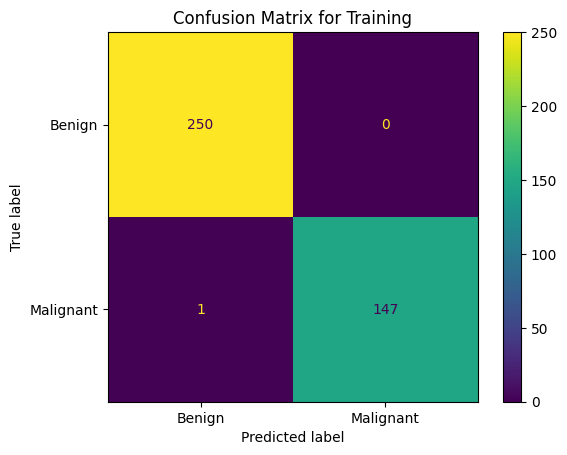

Training accuracy = 0.9974874371859297
Training F1 Score: 0.9966101694915255
Training Precision Score: 1.0
Training Recall Score: 0.9932432432432432



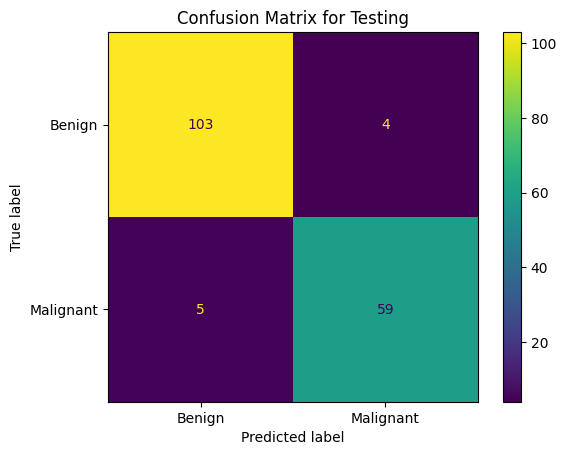

Testing accuracy = 0.9473684210526315
Coefficients:  [-152.86872933] [[-2.43551191e+01  1.26402925e+00  1.24067172e+00  1.62104658e-01
   2.48579956e+02 -7.25435303e+01 -4.54414511e+01  1.62259165e+02
  -1.09824361e+02  2.25567978e+02  1.39665041e+02  4.89810822e+00
  -6.88767575e+00 -2.51229591e-01  6.27308412e+01 -2.94987046e+02
  -7.72062780e+01  1.75833313e+02 -4.51956801e+02 -5.06527641e+01
   4.19183567e+00  7.24207926e-02  1.32460621e+00 -6.90091516e-02
   8.21953263e+01 -3.88724708e+01  5.60797097e+01  2.01552845e+02
   7.58301868e+01  1.34258414e+02]]
Testing F1 Score: 0.9291338582677166
Testing Precision Score: 0.9365079365079365
Testing Recall Score: 0.921875
Normalized coefficients: [array([-0.35469954, -0.29125442, -0.29131227, -0.29398331,  0.32121665,
       -0.47403681, -0.40691926,  0.10744559, -0.56636176,  0.26422812,
        0.05149187, -0.28225473, -0.3114419 , -0.29500692, -0.13903356,
       -1.02491205, -0.48558398,  0.1410616 , -1.41364332, -0.41982493,
       

In [ ]:
# Extract the regressors and the target from the data frame
# x, y = features.iloc[:,:].to_numpy(), targets.iloc[:,0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=0, stratify=targets)
# print(X_train.shape)
# print(X_test.shape)

model = LogisticRegression(solver='newton-cg', random_state=0,penalty=None).fit(X_train, y_train)
ypred_train = model.predict(X_train)
cfm = confusion_matrix(y_train, ypred_train)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["Benign", "Malignant"])
cm_display.plot()
plt.title('Confusion Matrix for Training')
plt.show()
training_f1_score = f1_score(y_train, ypred_train, pos_label='M')
training_precision_score = precision_score(y_train, ypred_train, pos_label='M')
training_recall_score = recall_score(y_train, ypred_train, pos_label='M')
print(f"Training accuracy = {model.score(X_train, y_train)}")
print(f"Training F1 Score: {training_f1_score}")
print(f"Training Precision Score: {training_precision_score}")
print(f"Training Recall Score: {training_recall_score}")
print(f"False Alarm Rate: {1 - (cfm[0][0] / (cfm[0][0] + cfm[0][1]))}")
print()

ypred = model.predict(X_test)
cfm = confusion_matrix(y_test, ypred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["Benign", "Malignant"])
cm_display.plot()
plt.title('Confusion Matrix for Testing')
plt.show()
testing_f1_score = f1_score(y_test, ypred, pos_label='M')
testing_precision_score = precision_score(y_test, ypred, pos_label='M')
testing_recall_score = recall_score(y_test, ypred, pos_label='M')
print(f"Testing accuracy = {model.score(X_test, y_test)}")
print(f"Coefficients: ", model.intercept_, model.coef_)
print(f"Testing F1 Score: {testing_f1_score}")
print(f"Testing Precision Score: {testing_precision_score}")
print(f"Testing Recall Score: {testing_recall_score}")
print(f"False Alarm Rate: {1 - (cfm[0][0] / (cfm[0][0] + cfm[0][1]))}")

x_transpose = features.transpose()
std_list = []
mean_list = []
for i in range(x_transpose.shape[0]):
    std_list.append(stdev(x_transpose[i]))
    mean_list.append(mean(x_transpose[i]))
# print(std_list)
# print(mean_list)

normalized_coefficients = []
for i in range(len(model.coef_)):
    # print(model.coef_[i], mean_list[i], std_list[i])
    normalized_coefficients.append((model.coef_[i] - mean_list[i]) / std_list[i])
print(f"Normalized coefficients: {normalized_coefficients}")
order = abs(np.array(normalized_coefficients)).argsort()
selected_columns = features.columns[order[0]]
print(f"Last values are most important: {selected_columns}")

 [20 pts] Split the samples into 70% Training and 30% Testing at random. Make sure to use
“stratify=y” in the test_train_split function. Build a pipeline using the Standard scaler and logistic
regression. Use the default penalty settings of Logistic Regression. After fitting the data, what is
the model’s training and testing accuracy? Which features are most important?

    Training accuracy = 0.9974874371859297
    Testing accuracy = 0.9473684210526315

This array contains the features arranged from least to most important:

    ['fractal_dimension3', 'radius2', 'smoothness3', 'symmetry3',
        'concave_points1', 'smoothness2', 'concave_points2', 'concavity3',
        'concave_points3', 'fractal_dimension1', 'texture2', 'radius3',
        'perimeter3', 'texture1', 'perimeter1', 'area1', 'texture3', 'area3',
        'area2', 'perimeter2', 'smoothness1', 'radius1', 'compactness3',
        'concavity1', 'fractal_dimension2', 'compactness1', 'concavity2',
        'symmetry1', 'compactness2', 'symmetry2']

The top 5 features are: 

     symmetry2, compactness2, symmetry1, concavity2, compactness1

AUC of training set:  1.0


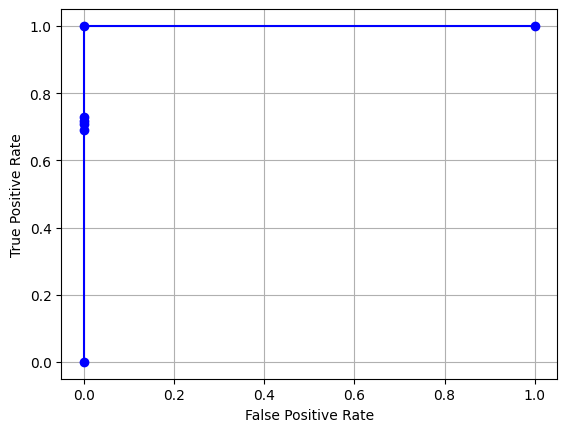

AUC of testing set:  0.9856892523364486


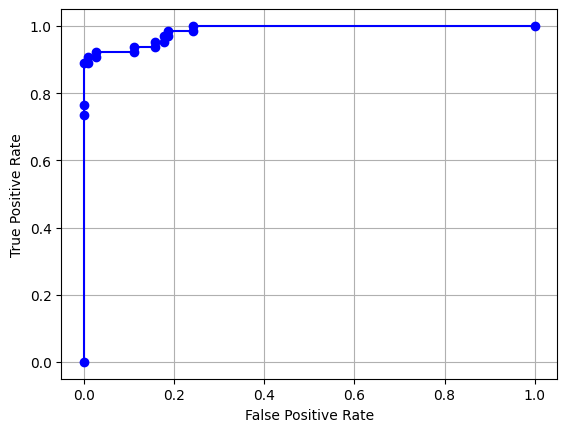

In [21]:
from sklearn import metrics

y2 = model.predict_proba(X_train)
# Use the binary labels for the training set
y_train_bin = (y_train == 'M').astype(int)
y_train_bin_values = y_train_bin['Diagnosis'].values

fpr, tpr, thresholds = metrics.roc_curve(y_train_bin_values, y2[:,1])
print(f"AUC of training set: ", metrics.roc_auc_score(y_train_bin_values, y2[:,1]))
plt.plot(fpr, tpr, 'b-o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

from sklearn import metrics

# Use the predicted probabilities for the positive class (Malignant, 'M')
y2 = model.predict_proba(X_test)

y_test_bin = (y_test == 'M').astype(int)
y_test_bin_values = y_test_bin['Diagnosis'].values

fpr, tpr, thresholds = metrics.roc_curve(y_test_bin_values, y2[:, 1])
print(f"AUC of testing set: ", metrics.roc_auc_score(y_test_bin_values, y2[:, 1]))
plt.plot(fpr, tpr, 'b-o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

[20 pts] From your answer in item (a), generate a confusion matrix, then calculate the other
metrics: F1-score, Precision, Recall, and False alarm rate. Finally, plot the ROC curve and report
the AUC. For this item, make a result for both the training and testing data, separately.

Training F1 Score: 0.9966101694915255
Training Precision Score: 1.0
Training Recall Score: 0.9932432432432432